In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)# To see all the columns of a dataframe
#pd.set_option('display.max_rows', None)

In [2]:
# Function to reduce the memory usage of various Dataframes
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
       
        1. Iterate over every column
        2. Determine if the column is numeric
        3. Determine if the column can be represented by an integer
        4. Find the min and the max value
        5. Determine and apply the smallest datatype that can fit the range of values

    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


In [3]:
def import_data(file):
    """create a dataframe and optimize its memory usage"""
    df = pd.read_csv(file, parse_dates=True, keep_date_col=True)
    df = reduce_mem_usage(df)
    return df

In [4]:
# Loading the cleaned Training Set
train = import_data('train_clean_FE.csv')

Memory usage of dataframe is 360.72 MB
Memory usage after optimization is: 72.36 MB
Decreased by 79.9%


In [6]:
# Checking the cleaned Training set for any missing values
print('The no. of missing values in the training data are: ',train.isna().sum().sum())

The no. of missing values in the training data are:  0


In [7]:
# Viewing the head of the cleaned training set
train.head()

,CNT_CHILDREN,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,BU_YEARS_CREDIT,BU_CREDIT_DAY_OVERDUE,BU_YEARS_CREDIT_ENDDATE,BU_CNT_CREDIT_PROLONG,BU_AMT_CREDIT_SUM,BU_AMT_CREDIT_SUM_DEBT,BU_AMT_CREDIT_SUM_OVERDUE,BU_YEARS_CREDIT_UPDATE,BU_PREV_BU_LOAN_CNT,BU_CREDIT_ACTIVE_ACTIVE,BU_CREDIT_ACTIVE_CLOSED,BU_CREDIT_TYPE_CONSUMER CREDIT,BU_CREDIT_TYPE_CREDIT CARD,PREV_APP_AMT_ANNUITY,PREV_APP_AMT_APPLICATION,PREV_APP_AMT_CREDIT,PREV_APP_AMT_GOODS_PRICE,PREV_APP_HOUR_APPR_PROCESS_START,PREV_APP_NFLAG_LAST_APPL_IN_DAY,PREV_APP_YEARS_DECISION,PREV_APP_SELLERPLACE_AREA,PREV_APP_CNT_PAYMENT,PREV_APP_PREV_APP_CNT,PREV_APP_NAME_CONTRACT_TYPE_CASH LOANS,PREV_APP_NAME_CONTRACT_TYPE_CONSUMER LOANS,PREV_APP_NAME_CONTRACT_TYPE_REVOLVING LOANS,PREV_APP_WEEKDAY_APPR_PROCESS_START_FRIDAY,PREV_APP_WEEKDAY_APPR_PROCESS_START_MONDAY,PREV_APP_WEEKDAY_APPR_PROCESS_START_SATURDAY,PREV_APP_WEEKDAY_APPR_PROCESS_START_THURSDAY,PREV_APP_WEEKDAY_APPR_PROCESS_START_TUESDAY,PREV_APP_WEEKDAY_APPR_PROCESS_START_WEDNESDAY,PREV_APP_FLAG_LAST_APPL_PER_CONTRACT_Y,PREV_APP_NAME_CASH_LOAN_PURPOSE_XAP,PREV_APP_NAME_CASH_LOAN_PURPOSE_XNA,PREV_APP_NAME_CONTRACT_STATUS_APPROVED,PREV_APP_NAME_CONTRACT_STATUS_CANCELED,PREV_APP_NAME_CONTRACT_STATUS_REFUSED,PREV_APP_NAME_PAYMENT_TYPE_CASH THROUGH THE BANK,PREV_APP_NAME_PAYMENT_TYPE_XNA,PREV_APP_CODE_REJECT_REASON_HC,PREV_APP_CODE_REJECT_REASON_LIMIT,PREV_APP_CODE_REJECT_REASON_XAP,PREV_APP_NAME_CLIENT_TYPE_NEW,PREV_APP_NAME_CLIENT_TYPE_REFRESHED,PREV_APP_NAME_CLIENT_TYPE_REPEATER,PREV_APP_NAME_GOODS_CATEGORY_AUDIO/VIDEO,PREV_APP_NAME_GOODS_CATEGORY_COMPUTERS,PREV_APP_NAME_GOODS_CATEGORY_CONSUMER ELECTRONICS,PREV_APP_NAME_GOODS_CATEGORY_MOBILE,PREV_APP_NAME_GOODS_CATEGORY_XNA,PREV_APP_NAME_PORTFOLIO_CARDS,PREV_APP_NAME_PORTFOLIO_CASH,PREV_APP_NAME_PORTFOLIO_POS,PREV_APP_NAME_PORTFOLIO_XNA,PREV_APP_NAME_PRODUCT_TYPE_XNA,PREV_APP_NAME_PRODUCT_TYPE_X-SELL,PREV_APP_CHANNEL_TYPE_COUNTRY-WIDE,PREV_APP_CHANNEL_TYPE_CREDIT AND CASH OFFICES,PREV_APP_CHANNEL_TYPE_REGIONAL / LOCAL,PREV_APP_CHANNEL_TYPE_STONE,PREV_APP_NAME_SELLER_INDUSTRY_CONNECTIVITY,PREV_APP_NAME_SELLER_INDUSTRY_CONSUMER ELECTRONICS,PREV_APP_NAME_SELLER_INDUSTRY_XNA,PREV_APP_NAME_YIELD_GROUP_XNA,PREV_APP_NAME_YIELD_GROUP_HIGH,PREV_APP_NAME_YIELD_GROUP_LOW_NORMAL,PREV_APP_NAME_YIELD_GROUP_MIDDLE,PREV_APP_PRODUCT_COMBINATION_CARD STREET,PREV_APP_PRODUCT_COMBINATION_CARD X-SELL,PREV_APP_PRODUCT_COMBINATION_CASH,PREV_APP_PRODUCT_COMBINATION_CASH STREET: HIGH,PREV_APP_PRODUCT_COMBINATION_CASH X-SELL: HIGH,PREV_APP_PRODUCT_COMBINATION_CASH X-SELL: LOW,PREV_APP_PRODUCT_COMBINATION_CASH X-SELL: MIDDLE,PREV_APP_PRODUCT_COMBINATION_POS HOUSEHOLD WITH INTEREST,PREV_APP_PRODUCT_COMBINATION_POS HOUSEHOLD WITHOUT INTEREST,PREV_APP_PRODUCT_COMBINATION_POS INDUSTRY WITH INTEREST,PREV_APP_PRODUCT_COMBINATION_POS MOBILE WITH INTEREST,POS_CASH_MONTHS_BALANCE,POS_CASH_CNT_INSTALMENT,POS_CASH_CNT_INSTALMENT_FUTURE,POS_CASH_SK_DPD,POS_CASH_SK_DPD_DEF,POS_CASH_NAME_CONTRACT_STATUS_ACTIVE,POS_CASH_NAME_CON

In [8]:
# Loading the cleaned Test set
test = import_data('test_clean_FE.csv')

Memory usage of dataframe is 120.24 MB
Memory usage after optimization is: 24.93 MB
Decreased by 79.3%


In [9]:
# Checking the cleaned Training set for any missing values
print('The no. of missing values in the test data are: ',test.isna().sum().sum())

The no. of missing values in the test data are:  0


In [10]:
# Viewing the head of the cleaned test set
test.head()

,CNT_CHILDREN,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,BU_YEARS_CREDIT,BU_CREDIT_DAY_OVERDUE,BU_YEARS_CREDIT_ENDDATE,BU_CNT_CREDIT_PROLONG,BU_AMT_CREDIT_SUM,BU_AMT_CREDIT_SUM_DEBT,BU_AMT_CREDIT_SUM_OVERDUE,BU_YEARS_CREDIT_UPDATE,BU_PREV_BU_LOAN_CNT,BU_CREDIT_ACTIVE_ACTIVE,BU_CREDIT_ACTIVE_CLOSED,BU_CREDIT_TYPE_CONSUMER CREDIT,BU_CREDIT_TYPE_CREDIT CARD,PREV_APP_AMT_ANNUITY,PREV_APP_AMT_APPLICATION,PREV_APP_AMT_CREDIT,PREV_APP_AMT_GOODS_PRICE,PREV_APP_HOUR_APPR_PROCESS_START,PREV_APP_NFLAG_LAST_APPL_IN_DAY,PREV_APP_YEARS_DECISION,PREV_APP_SELLERPLACE_AREA,PREV_APP_CNT_PAYMENT,PREV_APP_PREV_APP_CNT,PREV_APP_NAME_CONTRACT_TYPE_CASH LOANS,PREV_APP_NAME_CONTRACT_TYPE_CONSUMER LOANS,PREV_APP_NAME_CONTRACT_TYPE_REVOLVING LOANS,PREV_APP_WEEKDAY_APPR_PROCESS_START_FRIDAY,PREV_APP_WEEKDAY_APPR_PROCESS_START_MONDAY,PREV_APP_WEEKDAY_APPR_PROCESS_START_SATURDAY,PREV_APP_WEEKDAY_APPR_PROCESS_START_THURSDAY,PREV_APP_WEEKDAY_APPR_PROCESS_START_TUESDAY,PREV_APP_WEEKDAY_APPR_PROCESS_START_WEDNESDAY,PREV_APP_FLAG_LAST_APPL_PER_CONTRACT_Y,PREV_APP_NAME_CASH_LOAN_PURPOSE_XAP,PREV_APP_NAME_CASH_LOAN_PURPOSE_XNA,PREV_APP_NAME_CONTRACT_STATUS_APPROVED,PREV_APP_NAME_CONTRACT_STATUS_CANCELED,PREV_APP_NAME_CONTRACT_STATUS_REFUSED,PREV_APP_NAME_PAYMENT_TYPE_CASH THROUGH THE BANK,PREV_APP_NAME_PAYMENT_TYPE_XNA,PREV_APP_CODE_REJECT_REASON_HC,PREV_APP_CODE_REJECT_REASON_LIMIT,PREV_APP_CODE_REJECT_REASON_XAP,PREV_APP_NAME_CLIENT_TYPE_NEW,PREV_APP_NAME_CLIENT_TYPE_REFRESHED,PREV_APP_NAME_CLIENT_TYPE_REPEATER,PREV_APP_NAME_GOODS_CATEGORY_AUDIO/VIDEO,PREV_APP_NAME_GOODS_CATEGORY_COMPUTERS,PREV_APP_NAME_GOODS_CATEGORY_CONSUMER ELECTRONICS,PREV_APP_NAME_GOODS_CATEGORY_MOBILE,PREV_APP_NAME_GOODS_CATEGORY_XNA,PREV_APP_NAME_PORTFOLIO_CARDS,PREV_APP_NAME_PORTFOLIO_CASH,PREV_APP_NAME_PORTFOLIO_POS,PREV_APP_NAME_PORTFOLIO_XNA,PREV_APP_NAME_PRODUCT_TYPE_XNA,PREV_APP_NAME_PRODUCT_TYPE_X-SELL,PREV_APP_CHANNEL_TYPE_COUNTRY-WIDE,PREV_APP_CHANNEL_TYPE_CREDIT AND CASH OFFICES,PREV_APP_CHANNEL_TYPE_REGIONAL / LOCAL,PREV_APP_CHANNEL_TYPE_STONE,PREV_APP_NAME_SELLER_INDUSTRY_CONNECTIVITY,PREV_APP_NAME_SELLER_INDUSTRY_CONSUMER ELECTRONICS,PREV_APP_NAME_SELLER_INDUSTRY_XNA,PREV_APP_NAME_YIELD_GROUP_XNA,PREV_APP_NAME_YIELD_GROUP_HIGH,PREV_APP_NAME_YIELD_GROUP_LOW_NORMAL,PREV_APP_NAME_YIELD_GROUP_MIDDLE,PREV_APP_PRODUCT_COMBINATION_CARD STREET,PREV_APP_PRODUCT_COMBINATION_CARD X-SELL,PREV_APP_PRODUCT_COMBINATION_CASH,PREV_APP_PRODUCT_COMBINATION_CASH STREET: HIGH,PREV_APP_PRODUCT_COMBINATION_CASH X-SELL: HIGH,PREV_APP_PRODUCT_COMBINATION_CASH X-SELL: LOW,PREV_APP_PRODUCT_COMBINATION_CASH X-SELL: MIDDLE,PREV_APP_PRODUCT_COMBINATION_POS HOUSEHOLD WITH INTEREST,PREV_APP_PRODUCT_COMBINATION_POS HOUSEHOLD WITHOUT INTEREST,PREV_APP_PRODUCT_COMBINATION_POS INDUSTRY WITH INTEREST,PREV_APP_PRODUCT_COMBINATION_POS MOBILE WITH INTEREST,POS_CASH_MONTHS_BALANCE,POS_CASH_CNT_INSTALMENT,POS_CASH_CNT_INSTALMENT_FUTURE,POS_CASH_SK_DPD,POS_CASH_SK_DPD_DEF,POS_CASH_NAME_CONTRACT_STATUS_ACTIVE,POS_CASH_NAME_CON

In [11]:
# Getting the info of the Training dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230633 entries, 0 to 230632
Columns: 205 entries, CNT_CHILDREN to PAYOVER_TIME_YEARS
dtypes: float16(92), float32(10), int16(2), int8(101)
memory usage: 72.4 MB


In [12]:
# Getting the info of the Test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76878 entries, 0 to 76877
Columns: 205 entries, CNT_CHILDREN to PAYOVER_TIME_YEARS
dtypes: float16(105), float32(10), int8(90)
memory usage: 24.9 MB


## Feature Selection Through Mutual Information


In [14]:
# Segregating the dummy variables from the numerical variables in order to normalize them.
dummy_cols = [x for x in train.columns if (pd.Series(train[x].unique()).isin([0,1]).all())]

In [15]:
# Getting the numerical columns of the feature space
num_cols = set(train.columns)-set(dummy_cols)

In [17]:
# Checking if no. of columns in dummy cols and num_cols are equal to number of columns  in training set or not?
print('Total no. of columns in dummy_cols & num_cols are: ',len(dummy_cols)+len(num_cols))

Total no. of columns in dummy_cols & num_cols are:  205


In [18]:
# Normalizing the Numerical columns of training set before calculating the Mutual Information using KNN algorithm.
from sklearn.preprocessing import MinMaxScaler 

In [19]:
scale = MinMaxScaler()
train_norm = scale.fit_transform(train[num_cols])

In [20]:
# Converting the numpy array to dataframe. V-IMP: Make sure to put back the original row labels,otherwise new 
# range_index begining from 0 is assigned to new df: Num_df_scaled
Num_df_scaled = pd.DataFrame(train_norm,columns=num_cols,index=train.index)

In [21]:
Num_df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230633 entries, 0 to 230632
Columns: 119 entries, PREV_APP_NAME_YIELD_GROUP_HIGH to PREV_APP_PRODUCT_COMBINATION_POS INDUSTRY WITH INTEREST
dtypes: float32(119)
memory usage: 104.7 MB


In [22]:
# Concatenating Scaled Numerical columns with the dummy variable columns of training dataset
train_scaled = pd.concat([Num_df_scaled,train[dummy_cols]],axis=1)

In [23]:
train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230633 entries, 0 to 230632
Columns: 205 entries, PREV_APP_NAME_YIELD_GROUP_HIGH to ORGANIZATION_TYPE_XNA
dtypes: float32(119), int8(86)
memory usage: 123.6 MB


In [24]:
# Importing Mutual Information classifier ferom sklearn
from sklearn.feature_selection import mutual_info_classif

In [25]:
# Segregating the Training set into Feature space and response variable
X_train_scaled = train_scaled.drop(columns='TARGET')
y_train = train_scaled['TARGET']

In [26]:
y_train.value_counts()

0    212014
1     18619
Name: TARGET, dtype: int64

In [27]:
# Computing Mutual info. between feature space and Response variable.
MI_X_train_y_train = mutual_info_classif(X_train_scaled,y_train,random_state=42)

In [29]:
# converting Mutual Info. values to corresponding Series MI.
MI = pd.Series(MI_X_train_y_train,index=X_train_scaled.columns)

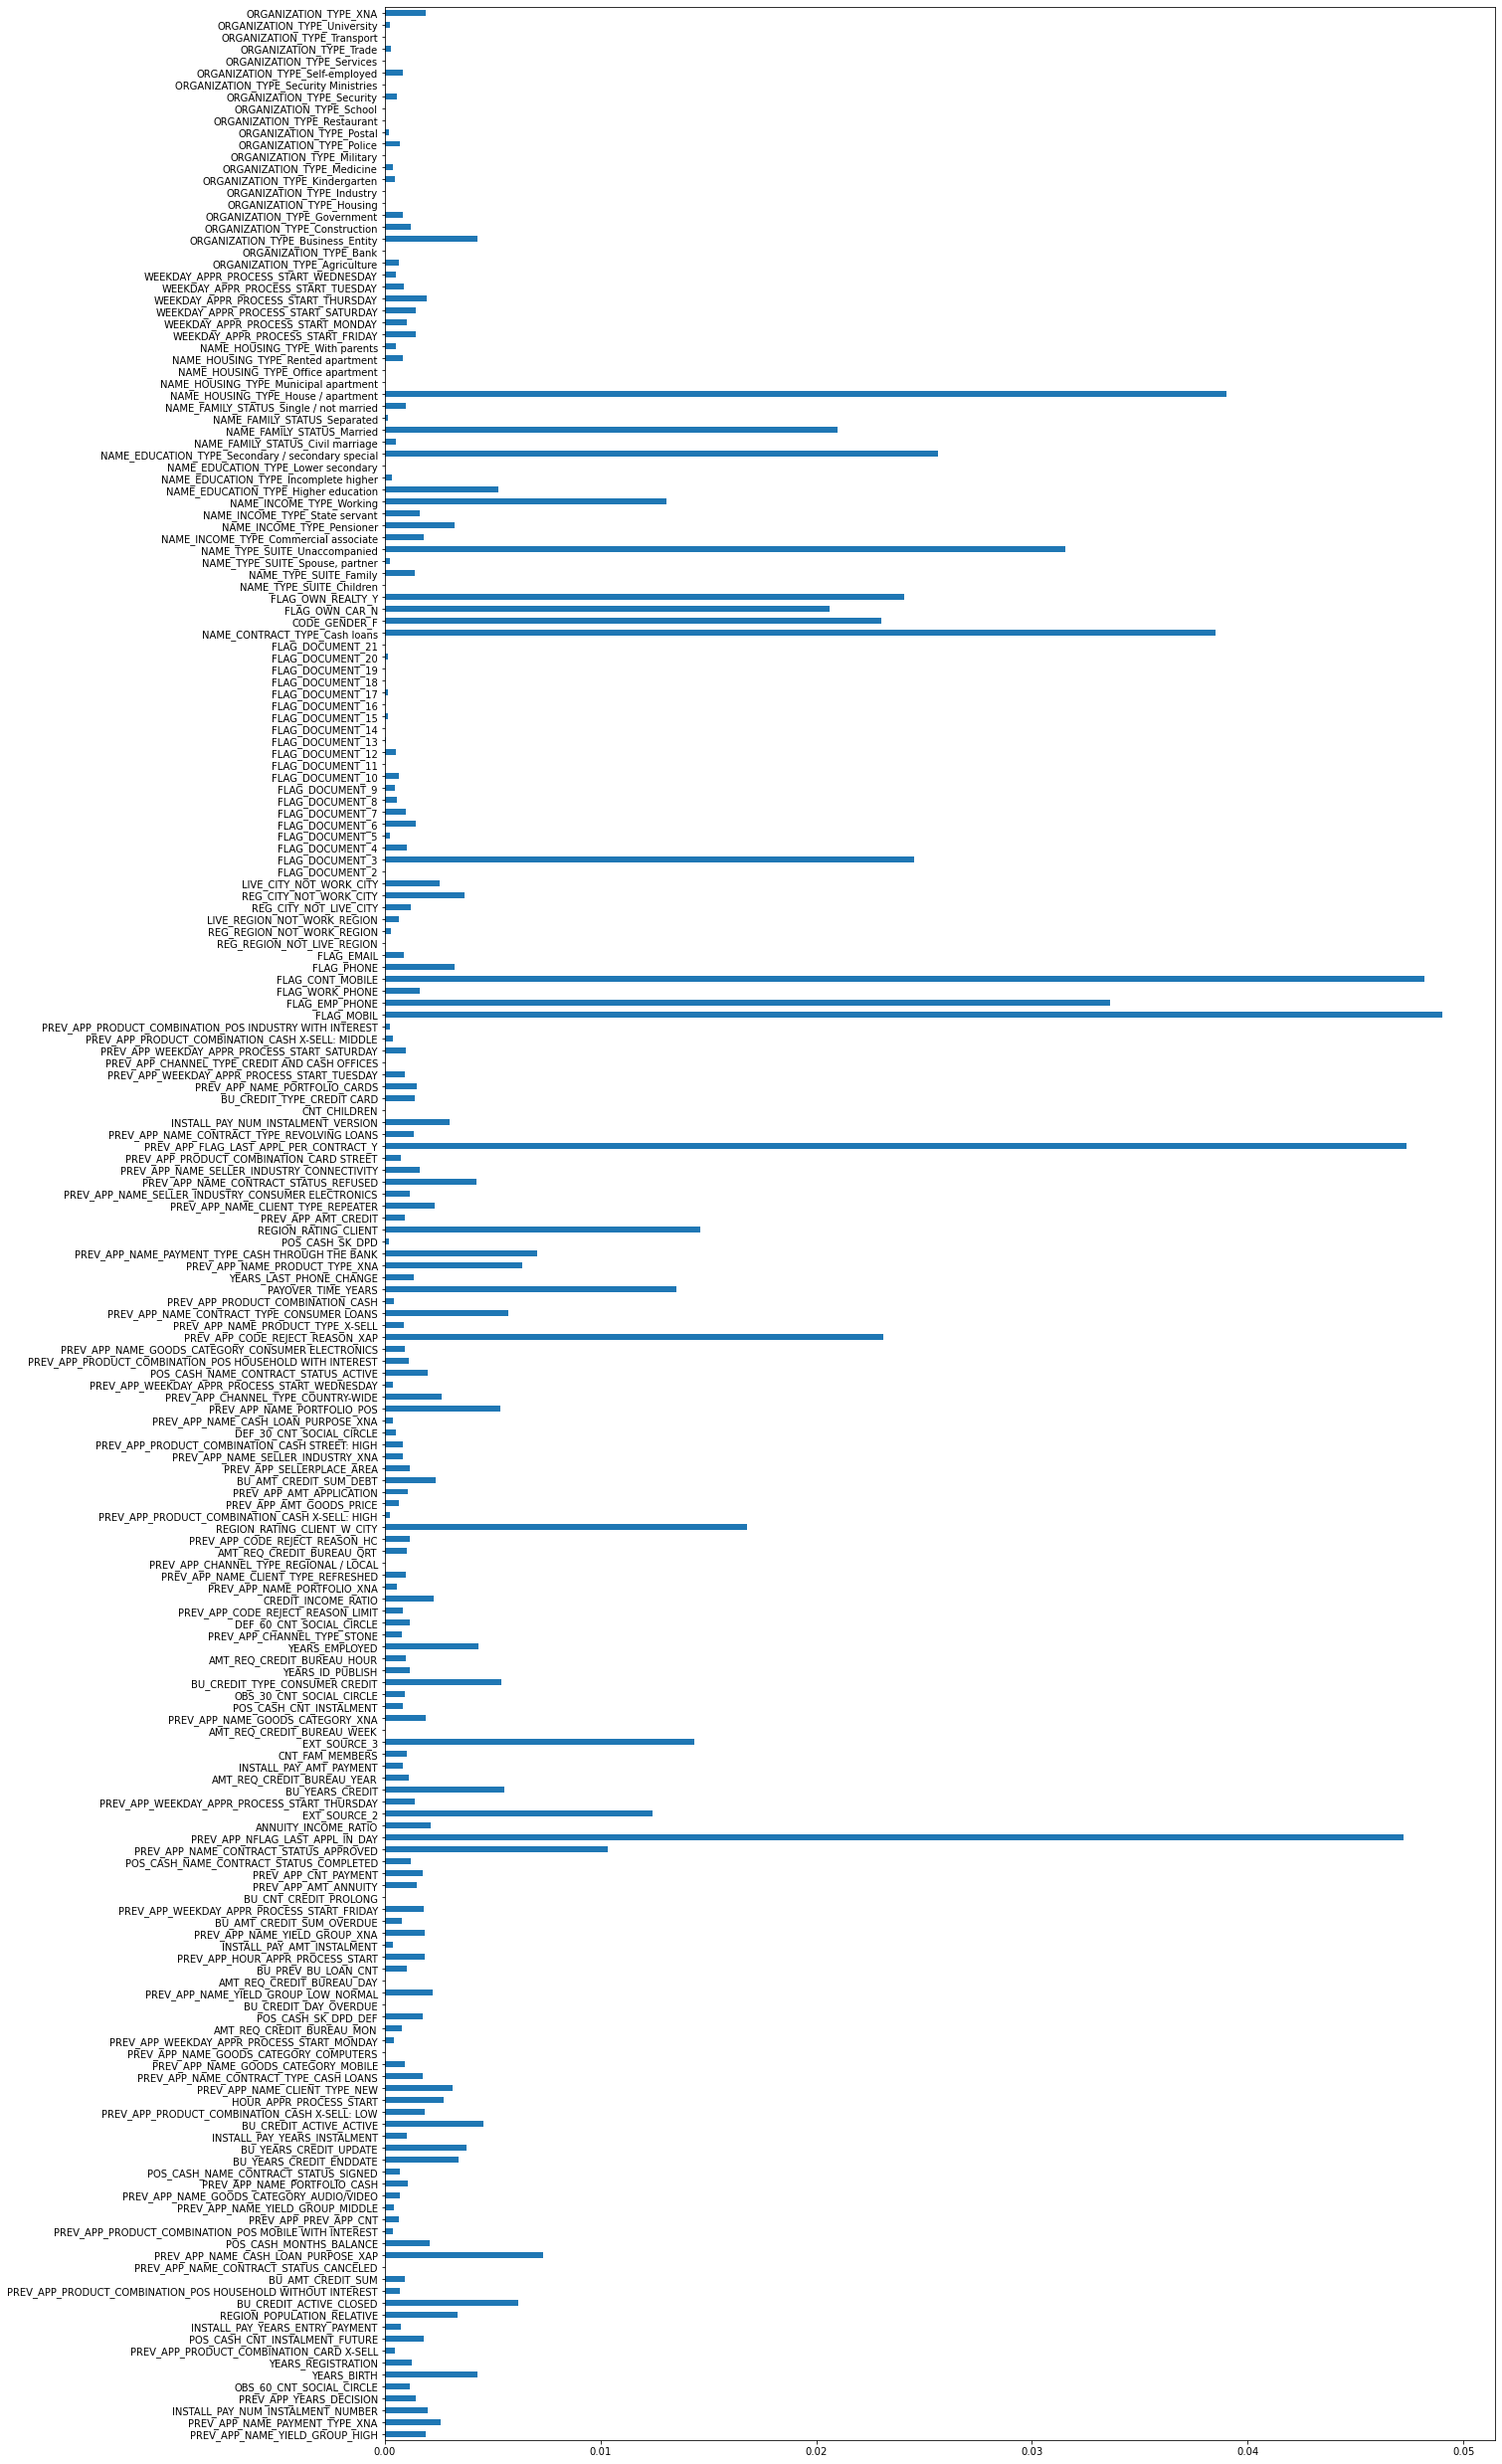

In [33]:
# Plotting the Mutual information corresponding to various features on the horizontal barplot.
fig = plt.figure(figsize=(20,45))
MI.plot.barh()
plt.show()

In [34]:
# Selecting only features having MI >= .001.
X_train_red = train[(MI.loc[MI >= .001]).index]

In [35]:
# Calculating the reduction in dimensionality of the feature space
print(' The reduction in the dimensionality of the feature space using mutual information is: ',len(X_train_scaled.columns)
                                                                                                   -len(X_train_red.columns))

 The reduction in the dimensionality of the feature space using mutual information is:  101


## Standardizing the numerical columns of the feature space

In [37]:
num_cols

{'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'ANNUITY_INCOME_RATIO',
 'BU_AMT_CREDIT_SUM',
 'BU_AMT_CREDIT_SUM_DEBT',
 'BU_AMT_CREDIT_SUM_OVERDUE',
 'BU_CNT_CREDIT_PROLONG',
 'BU_CREDIT_ACTIVE_ACTIVE',
 'BU_CREDIT_ACTIVE_CLOSED',
 'BU_CREDIT_DAY_OVERDUE',
 'BU_CREDIT_TYPE_CONSUMER CREDIT',
 'BU_CREDIT_TYPE_CREDIT CARD',
 'BU_PREV_BU_LOAN_CNT',
 'BU_YEARS_CREDIT',
 'BU_YEARS_CREDIT_ENDDATE',
 'BU_YEARS_CREDIT_UPDATE',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'CREDIT_INCOME_RATIO',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'HOUR_APPR_PROCESS_START',
 'INSTALL_PAY_AMT_INSTALMENT',
 'INSTALL_PAY_AMT_PAYMENT',
 'INSTALL_PAY_NUM_INSTALMENT_NUMBER',
 'INSTALL_PAY_NUM_INSTALMENT_VERSION',
 'INSTALL_PAY_YEARS_ENTRY_PAYMENT',
 'INSTALL_PAY_YEARS_INSTALMENT',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCL

In [38]:
# Getting the numerical columns from the reduced training set
num_cols_r = list(set(num_cols).intersection(set(X_train_red.columns)))

In [40]:
# Getting the reduction in the no. of numerical columns
print('The reduction in the no. of numerical features is: ',len(num_cols)-len(num_cols_r))

The reduction in the no. of numerical features is:  48


In [41]:
# Importing the Standard scaler from Sklearn
from sklearn.preprocessing import StandardScaler

In [42]:
# Instantiating the Standard Scaler object & fit_transforming the reduced training set.
st_scaler = StandardScaler()
arr = st_scaler.fit_transform(X_train_red[num_cols_r])

In [43]:
# Converting the array to the corresponding dataframe
Num_df_scaled = pd.DataFrame(arr,columns=num_cols_r,index=X_train_red.index)

In [44]:
Num_df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230633 entries, 0 to 230632
Data columns (total 71 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   PREV_APP_NAME_YIELD_GROUP_HIGH                            230633 non-null  float32
 1   PREV_APP_NAME_PRODUCT_TYPE_XNA                            230633 non-null  float32
 2   PREV_APP_NAME_PAYMENT_TYPE_XNA                            230633 non-null  float32
 3   PREV_APP_NAME_PAYMENT_TYPE_CASH THROUGH THE BANK          230633 non-null  float32
 4   INSTALL_PAY_NUM_INSTALMENT_NUMBER                         230633 non-null  float32
 5   PREV_APP_NAME_YIELD_GROUP_XNA                             230633 non-null  float32
 6   PREV_APP_YEARS_DECISION                                   230633 non-null  float32
 7   REGION_RATING_CLIENT                                      230633 non-null  float32
 8   OBS_

In [45]:
# Getting the Dummy Variable Categorical columns of the reduced training set
cat_cols_r = list(set(X_train_red.columns) - set(num_cols_r))

In [46]:
# Concatenating the Numerical columns with Dummy Variable Categorical columns of Training Data
X_train_red_st = pd.concat([Num_df_scaled,X_train_red[cat_cols_r]],axis=1)

In [47]:
X_train_red_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230633 entries, 0 to 230632
Columns: 103 entries, PREV_APP_NAME_YIELD_GROUP_HIGH to CODE_GENDER_F
dtypes: float32(71), int8(32)
memory usage: 69.5 MB


### Standardizing the numerical columns of the test data

In [48]:
# Transforming the Numerical columns of the test set with the same standard scaler object as was used to fit Training set
arr1 = st_scaler.transform(test[num_cols_r])

In [49]:
# Converting the array to the corresponding dataframe 
Num_df_scaled = pd.DataFrame(arr1,columns=num_cols_r,index=test.index)

In [50]:
Num_df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76878 entries, 0 to 76877
Data columns (total 71 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   PREV_APP_NAME_YIELD_GROUP_HIGH                            76878 non-null  float32
 1   PREV_APP_NAME_PRODUCT_TYPE_XNA                            76878 non-null  float32
 2   PREV_APP_NAME_PAYMENT_TYPE_XNA                            76878 non-null  float32
 3   PREV_APP_NAME_PAYMENT_TYPE_CASH THROUGH THE BANK          76878 non-null  float32
 4   INSTALL_PAY_NUM_INSTALMENT_NUMBER                         76878 non-null  float32
 5   PREV_APP_NAME_YIELD_GROUP_XNA                             76878 non-null  float32
 6   PREV_APP_YEARS_DECISION                                   76878 non-null  float32
 7   REGION_RATING_CLIENT                                      76878 non-null  float32
 8   OBS_60_CNT_SOCIA

In [51]:
# Concatenating the Numerical columns with Categorical columns of Test Data
X_test_red_st = pd.concat([Num_df_scaled,test[cat_cols_r]],axis=1)

In [52]:
X_test_red_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76878 entries, 0 to 76877
Columns: 103 entries, PREV_APP_NAME_YIELD_GROUP_HIGH to CODE_GENDER_F
dtypes: float32(71), int8(32)
memory usage: 23.2 MB


In [53]:
# Saving the Reduced Training set as a CSV File
X_train_red_st.to_csv('X_train_final.csv',index=False)

In [54]:
# Saving the Reduced Test set as a CSV File
X_test_red_st.to_csv('X_test_final.csv',index=False)

In [55]:
# Saving the training labels set as a CSV File
train['TARGET'].to_csv('y_train.final.csv',index=False)

In [56]:
# Saving the test labels set as a CSV File
test['TARGET'].to_csv('y_test.final.csv',index=False)

In [57]:
len(train['TARGET'])

230633

In [58]:
len(test['TARGET'])

76878